# Part I - Exploring PISA 2012
## by Daniel Oliveira

## Introduction
This document explores a dataset regarding a survey of 15 year-old students' skills and knowledge, with around 510,000 students in 65 economies.

An example of the survey can be read here: https://www.oecd.org/pisa/pisaproducts/MS12_StQ_FORM_A_ENG.pdf and another here: https://www.oecd.org/pisa/pisaproducts/PISA12_StQ_FORM_B_ENG.pdf (these 2 should have all the questions I use in this analysis)

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Due to an error, I have to open the file with encoding latin-1 and dtype unicode, so I'll indicate the dtypes later
df_pisa = pd.read_csv('pisa2012.csv', encoding = 'latin-1', dtype = 'unicode')

In [3]:
# I'll also make a copy before the data wrangling process
df_pisa_copy = df_pisa.copy()

In [4]:
df_pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [5]:
df_pisa.shape

(485490, 636)

In [6]:
df_pisa.columns.values

array(['Unnamed: 0', 'CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC',
       'SCHOOLID', 'STIDSTD', 'ST01Q01', 'ST02Q01', 'ST03Q01', 'ST03Q02',
       'ST04Q01', 'ST05Q01', 'ST06Q01', 'ST07Q01', 'ST07Q02', 'ST07Q03',
       'ST08Q01', 'ST09Q01', 'ST115Q01', 'ST11Q01', 'ST11Q02', 'ST11Q03',
       'ST11Q04', 'ST11Q05', 'ST11Q06', 'ST13Q01', 'ST14Q01', 'ST14Q02',
       'ST14Q03', 'ST14Q04', 'ST15Q01', 'ST17Q01', 'ST18Q01', 'ST18Q02',
       'ST18Q03', 'ST18Q04', 'ST19Q01', 'ST20Q01', 'ST20Q02', 'ST20Q03',
       'ST21Q01', 'ST25Q01', 'ST26Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04',
       'ST26Q05', 'ST26Q06', 'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10',
       'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14', 'ST26Q15', 'ST26Q16',
       'ST26Q17', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST27Q05',
       'ST28Q01', 'ST29Q01', 'ST29Q02', 'ST29Q03', 'ST29Q04', 'ST29Q05',
       'ST29Q06', 'ST29Q07', 'ST29Q08', 'ST35Q01', 'ST35Q02', 'ST35Q03',
       'ST35Q04', 'ST35Q05', 'ST35Q06', 'ST37Q01', 'ST37Q

In [7]:
# Know the grade of the participants, to have a better idea of the sample
df_pisa.groupby('ST01Q01').CNT.count()

ST01Q01
10    262631
11     38397
12      3436
13         3
7       3536
8      23764
9     152850
96       873
Name: CNT, dtype: int64

In [8]:
# 96 is not a grade. It could be either 9th or 6th grade, so we're going to remove it
df_pisa = df_pisa[df_pisa['ST01Q01'] != '96']

In [9]:
# Also want to know at what age did students start ISCED 1, since we are going to use that variable
df_pisa['ST06Q01'].unique()

array(['6', '7', '8', '5', '9', nan, '4', '15', '10', '16', '14', '12',
       '11', '13'], dtype=object)

In [10]:
# Since we have missing values there, it will be difficult to change dtype to int. Let me see how many students didn't answer
sum(df_pisa['ST06Q01'].isnull())

27354

In [11]:
# Now we drop them
df_pisa = df_pisa.dropna(subset = ['ST06Q01'])
print(df_pisa.shape[0])

457263


In [12]:
# Undertand how many students were not born in the country of the test
print(df_pisa.shape[0] - sum(df_pisa.ST21Q01.isnull()))

29877


In [13]:
df_pisa.ST21Q01.unique()

array([nan, '4', '3', '13', '10', '5', '0', '6', '9', '2', '15', '12',
       '1', '14', '8', '7', '11', '16'], dtype=object)

In [14]:
# I'm going to remove these, to make sure any issues identified later aren't due to
#changing languages/culture/education (since these can be the cause of anxiety, lack of friends and others)

df_pisa.drop(df_pisa[df_pisa.ST21Q01.isin(['4', '3', '13', '10', '5', '0', '6', '9', '2', '15', '12',\
                                           '1', '14', '8', '7', '11', '16'])].index, inplace = True)

In [15]:
df_pisa.shape

(427386, 636)

I won't use all the columns in this dataframe, but I'll leave them for now and use only the ones I see fit as I go on with the analysis. I'll also convert the columns to the correct dtype as I use them, so we'll come back to clean our data once we have our questions defined.
For what I need now, this should suffice

### What is the structure of your dataset?

For the sake of this analysis, we now have 451951 students that answered this survey, all born in the country of the survey. All data types are "object" at this moment, but most of them are categorical or nominal by nature, due to the options available to the student, so most of the analysis will be done with that data type.

### What is/are the main feature(s) of interest in your dataset?

I would like to understand if perceptions of the student regarding his/her control of outcomes predict his/her behaviour and thoughts on mathematics and school.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I'm expecting to find that students who perceive they are in control of their outcomes (ST43) also have a higher ethic (ST46) in terms of effort torwards math learning. I also believe that lower perception of control of outcomes might predict absenteism (ST115) and may be correlated with starting school later (ST06).

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


There are 6 questions regarding the locus of control of the student torwards learning outcomes (all ST43). Let's see how their answers are distributed

In [16]:
# First I'll create a function to change dtype to categorical (since we'll need this later)
def generate_cat(columns_list, cat_list, df = df_pisa):
    """
    This function will change the dtype of a column to categorical
    
    Parameters:
        columns_list = a list of pandas DataFrame series (just column names) that we want to change to categorical dtype
        cat_list = a list of the variables within the series, already ordered
        df = dataframe used (in this case, always df_pisa)
    """
    for series in columns_list:
        classes = pd.api.types.CategoricalDtype(ordered = True, categories = cat_list)
        df[series] = df[series].astype(classes)

In [17]:
# Check dtypes now to compare later
questions_control = ['ST43Q01', 'ST43Q02', 'ST43Q03', 'ST43Q04', 'ST43Q05', 'ST43Q06']

for q in questions_control:
    print(df_pisa[q].dtypes)

object
object
object
object
object
object


In [18]:
# Use function to change dtype of control questions
agreement_options = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']

generate_cat(questions_control, agreement_options)

In [19]:
# Check dtypes again
for q in questions_control:
    print(df_pisa[q].dtypes)

category
category
category
category
category
category


In [20]:
# we'll use bar charts to see the distribution of our categorical data.
#We'll create a function for this since it will also be common

def bar_chart(series_name, df = df_pisa):
    """
    This function will generate a bar chart of proportion of counts of a certain Pandas series
    
    Parameters:
        series_name = name of the column
        df = Pandas dataframe used (which is always df_pisa in this case)
    """
    sb.countplot(data = df, x = series_name, color = sb.color_palette()[0])
    n_values = df[series_name].value_counts().sum()
    max_count = df[series_name].value_counts()[0]
    max_prop = max_count / n_values
    tick_props = np.arange(0, max_prop, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    plt.yticks(tick_props * n_values, tick_names)
    plt.ylabel('Proportion')
    plt.xlabel('Answers')
    plt.title('Proportion of answers in question {}'.format(series_name))
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = df[series_name].value_counts()[label.get_text()]
        pct_string = '{:0.1f}%'.format(100 * count / df[series_name].value_counts().sum())
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    ;

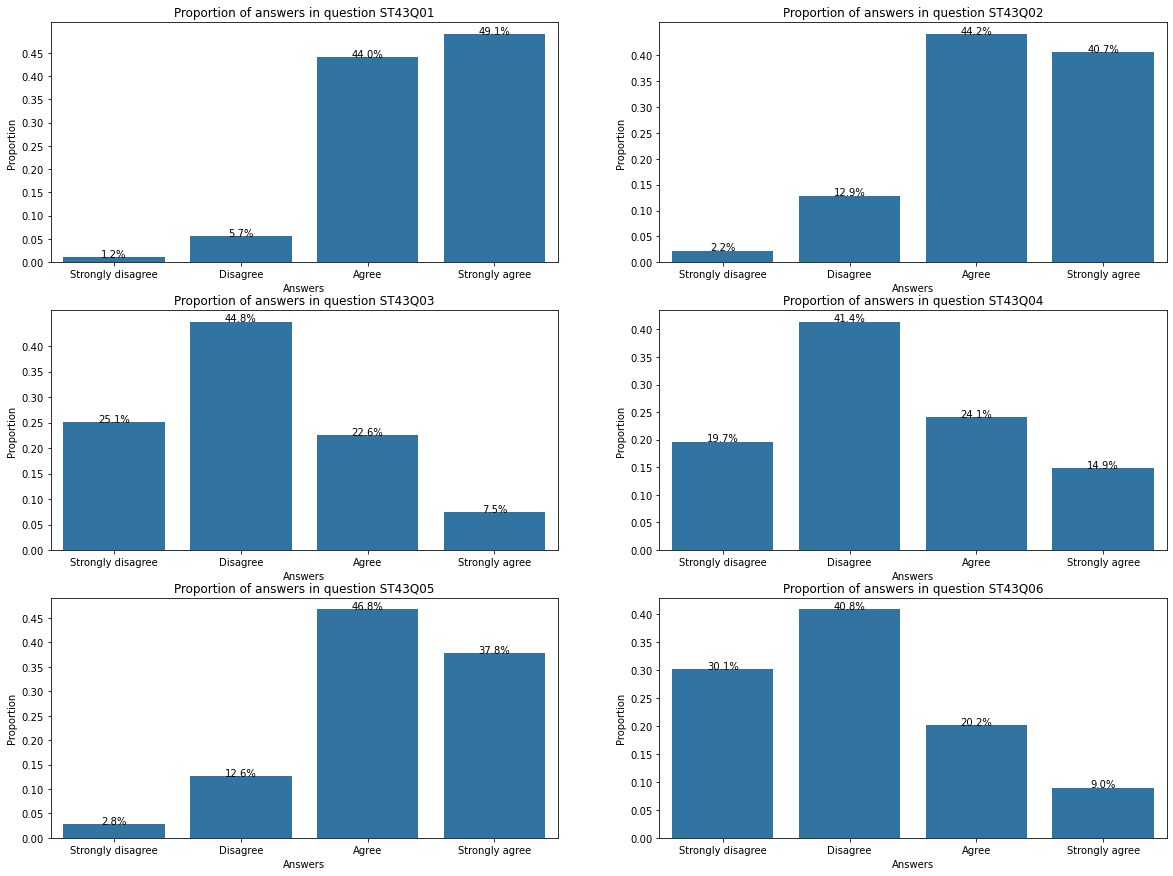

In [21]:
# Let's have an overview of these questions
plt.figure(figsize = [20,15])

plt.subplot(3,2,1)
bar_chart('ST43Q01')
plt.subplot(3,2,2)
bar_chart('ST43Q02')
plt.subplot(3,2,3)
bar_chart('ST43Q03')
plt.subplot(3,2,4)
bar_chart('ST43Q04')
plt.subplot(3,2,5)
bar_chart('ST43Q05')
plt.subplot(3,2,6)
bar_chart('ST43Q06');

First, let me leave here what is every question behind each variable:


* 'ST43Q01' = If I put in enough effort I can succeed in mathematics.
* 'ST43Q02' = Whether or not I do well in mathematics is completely up to me
* 'ST43Q03' = Family demands or other problems prevent me from putting a lot of time into my mathematics work. 
* 'ST43Q04' = If I had different teachers, I would try harder in mathematics. 
* 'ST43Q05' = If I wanted to, I could do well in mathematics.
* 'ST43Q06' = I do badly in mathematics whether or not I study for my exams. 

On the first 2 questions it seems that students perceive quite a lot of control of their outcomes, since around 85% (at least) agree with the statements. Same thing happens on the 5th question. But when it mentions actual life situations (regarding family and teachers) this perception of control lowers (goes to around 70%-60% of answers if we consider the ones who disagree with the statement). Same thing goes for the last question, 70% keep their positive outlook towards control of their outcomes, but 30% think they'll just do bad either way.

Note: questions where students decreased their locus of control are also the ones where the scale changes (higher perception of control means disagreeing with the statement, while the other questions require them to agree, this might have an impact on answers)

Now with questions regarding math effort ethics

In [22]:
# Let's change dtype. I'll always check if the function worked
# Check dtypes now to compare later
questions_ethics = ['ST46Q01', 'ST46Q02', 'ST46Q03', 'ST46Q04', 'ST46Q05', 'ST46Q06', 'ST46Q07', 'ST46Q08', 'ST46Q09']

for q in questions_ethics:
    print(df_pisa[q].dtypes)

object
object
object
object
object
object
object
object
object


In [23]:
# Use function
generate_cat(questions_ethics, agreement_options)

In [24]:
# Now we check
for q in questions_ethics:
    print(df_pisa[q].dtypes)

category
category
category
category
category
category
category
category
category


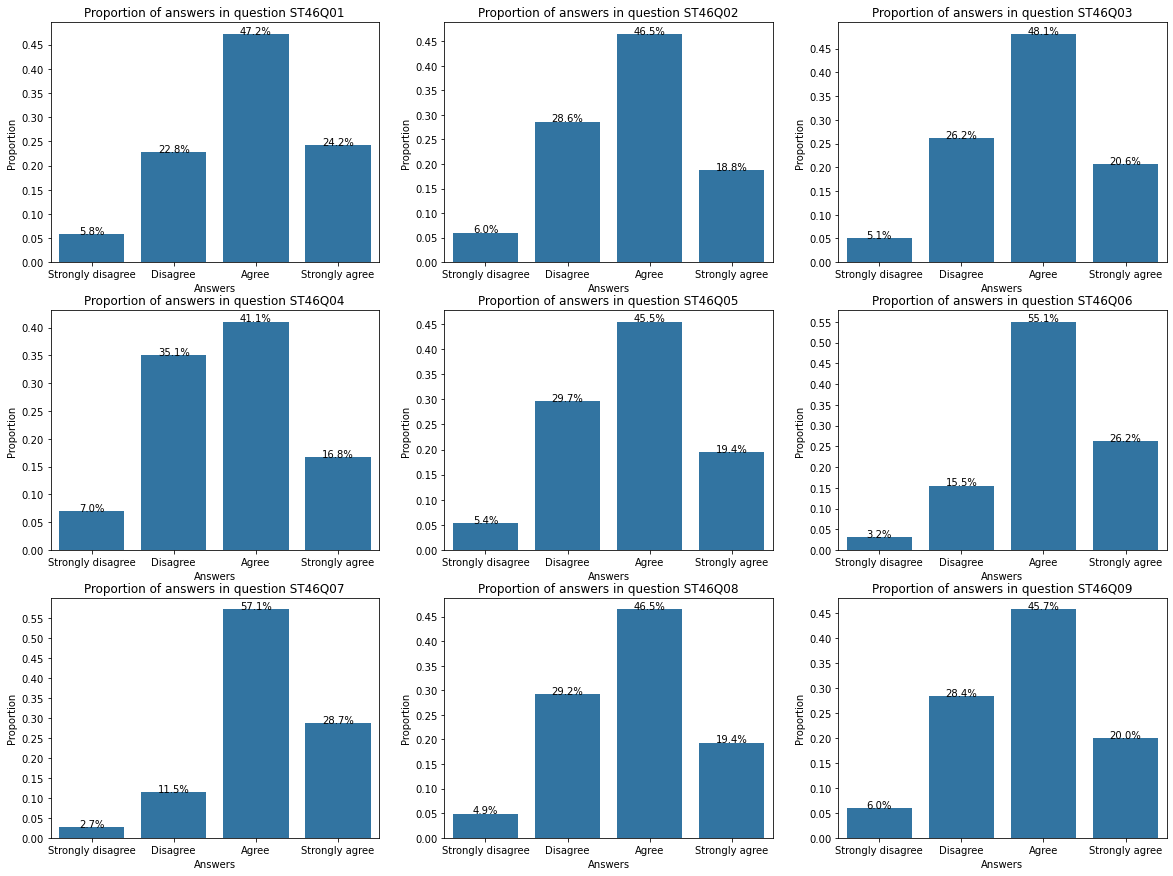

In [25]:
# Let's have an overview of these questions (ethics)
plt.figure(figsize = [20,15])

plt.subplot(3,3,1)
bar_chart('ST46Q01')
plt.subplot(3,3,2)
bar_chart('ST46Q02')
plt.subplot(3,3,3)
bar_chart('ST46Q03')
plt.subplot(3,3,4)
bar_chart('ST46Q04')
plt.subplot(3,3,5)
bar_chart('ST46Q05')
plt.subplot(3,3,6)
bar_chart('ST46Q06')
plt.subplot(3,3,7)
bar_chart('ST46Q07')
plt.subplot(3,3,8)
bar_chart('ST46Q08')
plt.subplot(3,3,9)
bar_chart('ST46Q09');

Questions for each variable:

* 'ST46Q01' = I finish my homework in time for mathematics class. 
* 'ST46Q02' = I work hard on my mathematics homework.
* 'ST46Q03' = I am prepared for my mathematics exams. 
* 'ST46Q04' = I study hard for mathematics quizzes. 
* 'ST46Q05' = I keep studying until I understand mathematics material. 
* 'ST46Q06' = I pay attention in mathematics class.
* 'ST46Q07' = I listen in mathematics class.
* 'ST46Q08' = I avoid distractions when I am studying mathematics. 
* 'ST46Q09' = I keep my mathematics work well organised.

Once again we have a tendency for agreement, but in this case in all questions agreement means the same: higher math work ethic.

This work ethic seems to waver the most in the 4th question, regarding the study for math quizzes. In fact, the questions where most students have a higher math work ethic are the ones where their "work" is passive, as in the 6th and 7th questions, mentioning that they are paying attention and listening to math classes. When it mentions studying or any kind of work related to maths their work ethic lowers.

Now let's check for absenteeism/truancy

In [26]:
#Change dtype to categorical. It's coded in numeric values
truancy_options = ['1', '2', '3', '4']
questions_truancy = ['ST115Q01']

print(df_pisa['ST115Q01'].dtypes)
generate_cat(questions_truancy, truancy_options)
print(df_pisa['ST115Q01'].dtypes)

object
category


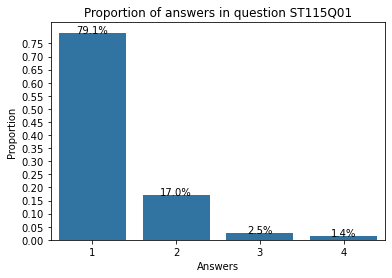

In [27]:
# Lucky for us, we're only studying one question this time, but a very important one
bar_chart('ST115Q01')

The question: In the last two full weeks of school, how many times did you skip some classes?

I'll leave the code for the answers here:
* 1 = None
* 2 = One or two times
* 3 = Three or four times
* 4 = Five or more times

Most of the studens who answered this survey haven't skipped any class (around 80%), and the ones who did was mostly once in the last two weeks (17%).

Now, for the last variable. Let's know at what age did these student start ISCED 1

In [28]:
# let's change dtype to int
df_pisa['ST06Q01'] = df_pisa['ST06Q01'].str.extract('(\d+)').astype(int)

print(df_pisa['ST06Q01'].dtypes)

int32


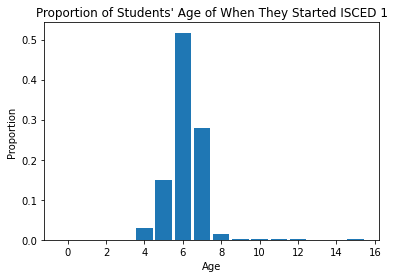

In [29]:
# Now let's plot a histogram of student's age of when they started ISCED 1. Since it's a discrete variabe, I'll plot
#the histogram with some space between bins and center them, similar to bar chart but I'll need to keep it as int and ordered

plt.hist(data = df_pisa, x = 'ST06Q01', bins = np.arange(0, df_pisa['ST06Q01'].max()+1, 1),\
         rwidth = 0.85, align = 'left', density = True)
plt.ylabel('Proportion')
plt.xlabel('Age')
plt.title('Proportion of Students\' Age of When They Started ISCED 1');

It seems that around 50% started when they were 6 years old, while most of the rest had either 7 (almost 30%) and 5 (around 15%) years old. Stil, there are some odd cases (but not many), starting a lot later than the mean. I need to see these numbers exactly, so I'm going to zoom in on the lower parts of the distribution and see the counts by number.

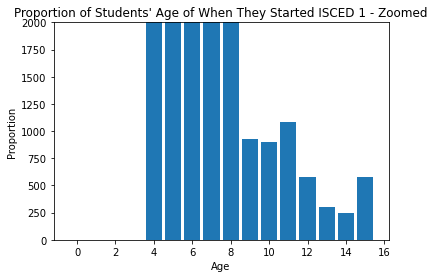

In [30]:
# Zoomed histogram
plt.hist(data = df_pisa, x = 'ST06Q01', bins = np.arange(0, df_pisa['ST06Q01'].max()+1, 1),\
         rwidth = 0.85, align = 'left')
plt.ylim(0, 2000)
plt.ylabel('Proportion')
plt.xlabel('Age')
plt.title('Proportion of Students\' Age of When They Started ISCED 1 - Zoomed');

In [31]:
df_pisa.groupby('ST06Q01').CNT.count()

ST06Q01
4      12345
5      64056
6     220997
7     118840
8       6542
9        927
10       897
11      1086
12       578
13       299
14       242
15       439
16       138
Name: CNT, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In pre wrangling I found a the grade '96', which was clearly wrong, so I removed it. Grades are not a variable of interest, however, but on the questions regarding the perception of control it's interesting that the ones with answers of less perceived control are the ones where the students had to disagree, while the other questions they had to agree. This might have influenced results.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to change the data type of all columns I am studying, since I used 'unicode' before. I had to think twice in terms of changing age to a categorical dtype because it makes sense to use a bar chart and not a histogram on a discrete variable, but age is interval nonetheless, so I simply made the histogram look more like a bar chart with spacing and centering its bars.

It seems weird to me that many students answered that they started ISCED 1 at a very late age, but I am not aware of how the education is in all of these countries and this distribution does get thinner so I'll leave it as it is since it might just be a sign of some education issues in certain cases.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Since I used a lot of categorical data types, I thought of using heatmaps to understand the relationships between them, with a number in each square to make it easier to understand (I also thought of scatter plots while using the size of each dot as a measure of frequency, but it's harder to read). However, I don't think there is any need to check for a relationship with every question. I'll use the ones that stood out the most in their univariate exploration.

ST43Q02 seems like a good choice for the control perception questions since it requires students to agree for a higher control perception and of those it's the one with higher difference in results.

I'll still check one of the other questions where students have to disagree for a higher perception of control, to check it up, so I'll use the ST43Q04 regarding the "blame" on teachers.

For the math work ethic questions I'll use the ST46Q04 and ST46Q05 since their answers are less centralized than the others, and they clearly mention the need to study.

I'll check the relationships between questions from control perception and math work ethics.

**Note:** Everything I'll point out in the next cells is not necessarily statisticaly significant, since we're only using visualizations for this project. So actual correlations and differences between variables would have to be further tested.

In [32]:
# Once again, since it's going to be frequent I'll create a function for the heat maps
def heatmap(column_x, column_y, df = df_pisa):
    """
    This function returns a heatmap
    Parameters:
        column_x = name of the column that will be in the x axis
        column_y = name of the column that will be in the y axis
        df = dataframe used (df_pisa by default for this analysis)
        """
    var = df.groupby([column_y, column_x]).size()
    var = var.reset_index(name='count')
    var = var.pivot(index = column_y, columns = column_x, values = 'count')
    sb.heatmap(var, annot = True, fmt = 'd', cmap = 'viridis_r')
    plt.title('Relationship between {} and {}'.format(column_x, column_y));

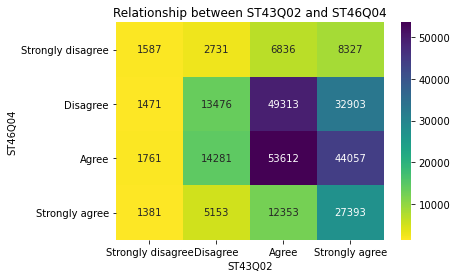

In [33]:
# Control vs Math Work Ethic (Pt1)
heatmap('ST43Q02', 'ST46Q04')

> 'ST43Q02' = Whether or not I do well in mathematics is completely up to me.

> 'ST46Q04' = I study hard for mathematics quizzes.

Since the "agree" option is the one most used in both questions, it's normal that those columns have higher counts. This is a problem with reading relationships of categorical variables since some frequencies are normal due to the already existing high count. So we need to look at frequencies that shouldn't be there - basicaly, the ones that go against their univariate distributions.

ST43Q02 has this order of most frequent answers (in univariate plot): Agree > Strongly agree > Disagree > Strongly disagree.
This order doesn't occur when ST46Q04 answer is also Strongly agree, and the difference is quite high (SA-SA: 27393), comparing with the frequency on the agree (SA-A: 12353, more than double). So:
* Students who firmly say they study hard for math quizzes tend to also say that it's up to them to do well in maths;

ST46Q04 has this order: Agree > Disagree > Strongly agree > Strongly disagree.
This is almost always the case, except when ST43Q02 answer is "Strongly disagree", which changes the order of both "strong" answers. Seems somewhat normal given the nature of the question, so:
* Students who strongly disagree that it's up to them to do well in maths seem to disagree strongly that they study hard for quizzes more than they strongly agree.

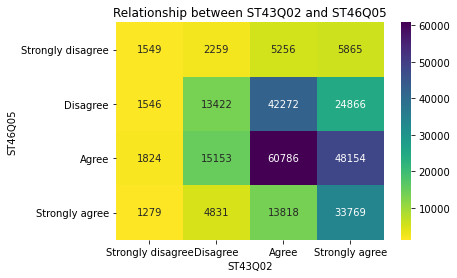

In [34]:
# Control vs Math Work Ethic (Pt2)
heatmap('ST43Q02', 'ST46Q05')

> 'ST43Q02' = Whether or not I do well in mathematics is completely up to me.

> 'ST46Q05' = I keep studying until I understand mathematics material. 


We can say that this relationship is very similar to the one before, the only difference is that it's even more centralized in the "agree" option, which is normal because ST46Q05 has more answers on "agree" than the previous (percentage-wise, atleast). Although the insights seem to standout even more due to the differences of the counts. So:
* Students who firmly say they keep studying until they understand mathematics tend to also say that it's up to them to do well in maths;
* Students who strongly disagree that it's up to them to do well in maths seem to disagree strongly that they keep stufying until they understand maths more than they strongly agree (and even disagree now! but for a very small amount, we could say it's the same).

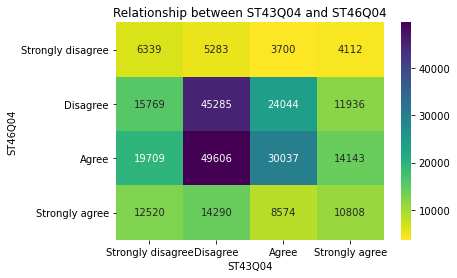

In [35]:
# Control vs Math Work Ethic (Pt3)
heatmap('ST43Q04', 'ST46Q04')

> 'ST43Q04' = If I had different teachers, I would try harder in mathematics. 

> 'ST46Q04' = I study hard for mathematics quizzes.

ST43Q04 has the following order of answers by frequency (univariate plot): Desagree > Agree > Strongly disagree > Strongly agree. This order doesn't occur when students answer strongly agree and strongly disagree on studying hard for math quizzes. So:
* Students who report studying hard for math quizzes have a tendency to agree less with the statement that they would try harder in maths if they had different teachers
* Students who report NOT studying hard for math quizzes more strongly disagree with the statement that they would try harder in maths if they had different teachers.

This last one is interesting, because students who (reportedly) study less put less blame on the teacher for their effort than the average student.

The frequency order for the ST46Q04 remains the same, regardless of the answer in ST43Q04, so nothing there to point out.

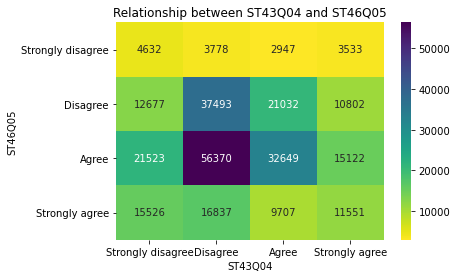

In [36]:
# Control vs Math Work Ethic (Pt4)
heatmap('ST43Q04', 'ST46Q05')

> 'ST43Q04' = If I had different teachers, I would try harder in mathematics.

> 'ST46Q05' = I keep studying until I understand mathematics material. 

Exactly the same thing happens here, regarding the ST43Q04 order. So:
* Students who report studying until they understand maths have a tendency to agree less with the statement that they would try harder in maths if they had different teachers
* Students who report NOT studying until they understand maths more strongly disagree with the statement that they would try harder in maths if they had different teachers.

The frequency order for the ST46Q05 is not the same in some cases:
* Students who strongly disagree that they would try harder in maths if they had different teachers, more strongly agree (than disagree) that they keep studying until they understand maths.
* Students who strongly agree that they would try harder if they had different teachers seem to more strongly agree (than disagree) that they keep studying until they understand.

This last one is also interesting, since it seems that those who strongly blame their teachers for not working harder also (reportedly) spend a high effort in studying math until they understand it. (maybe their effort to understand maths is high because they perceive the teacher has not good enough - one possible reason, but can't confirm)

Now let's see what's the relationship between perception of control of outcomes and students' truancy.

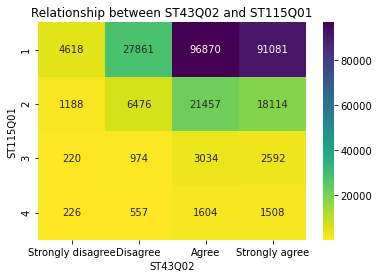

In [38]:
# Control vs Truancy (Pt1)
heatmap('ST43Q02', 'ST115Q01')

> 'ST43Q02' = Whether or not I do well in mathematics is completely up to me

Frequency order of answers (in univariate plot): Agree > Strongly agree > Disagree > Strongly disagree.

> 'ST115Q01' = In the last two full weeks of school, how many times did you skip some classes?

Frquency order of answers (in univariate plot): 1 > 2 > 3 > 4

The code for ST115 answers here:
* 1 = None
* 2 = One or two times
* 3 = Three or four times
* 4 = Five or more times

The frequencies on the univariate plots pretty much make the results in this heat map, since order by frequency remains the same. So it's hard to see if any variable seems to predict any other. Let's see with the other perception of control question.

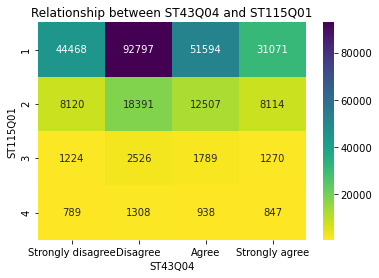

In [39]:
# Control vs Truancy (Pt1)
heatmap('ST43Q04', 'ST115Q01')

> 'ST43Q04' = If I had different teachers, I would try harder in mathematics.

Frequency order of answers (in univariate plot): Desagree > Agree > Strongly disagree > Strongly agree

> 'ST115Q01' = In the last two full weeks of school, how many times did you skip some classes?

Frquency order of answers (in univariate plot): 1 > 2 > 3 > 4

The code for ST115 answers here:
* 1 = None
* 2 = One or two times
* 3 = Three or four times
* 4 = Five or more times

Order of frequency remains pretty much the same. Interesting to note that the counts for students who strongly agree and strongly disagree regarding the "blame" on teachers for they efforts in maths is pretty much the same in all levels of truancy, except when truancy is none, but this could be simply due to sample size, since the frequency of these answers in the univariate plot is very similar to one another. In other words, seems like it's more due to chance than to an actual influence between these two variables (atleast through visuals).

I'll do a quick check if there's anything interesting in terms of a relationship between math work ethics and truancy (although it's not really part of my interest for this analysis, I want to see if I find a relationship there)

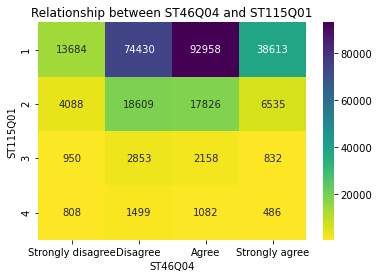

In [53]:
# Math Work Ethic vs Truancy (Pt1)
heatmap('ST46Q04', 'ST115Q01')

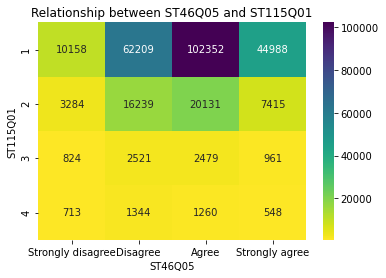

In [54]:
# Math Work Ethic vs Truancy (Pt2)
heatmap('ST46Q05', 'ST115Q01')

> 'ST46Q04' = I study hard for mathematics quizzes.

> 'ST46Q05' = I keep studying until I understand mathematics material.

ST46Q04 and ST46Q05 have this order by frequency (in univariate plot): Agree > Disagree > Strongly agree > Strongly disagree.

Since agree and disagree answers change their order of frequency, we can say that there are more students who (reportedly) study less for math quizzes when truancy is higher. Perhaps this is to be expected, considering its meaning.

When it's about studying to understand mathematics materials this order changes again but very mildly, it's pretty much the same count between them people who agree and disagree, but only on 3 or more class skips.

Now, for the relationship between perception of control and age I'll use a violin plot, since age is interval. I could use heat maps again since it's also a discrete variable, but I want to see if it provides me a better image of distribution of the results.

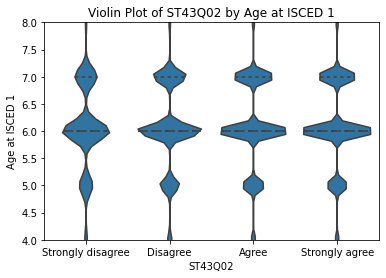

In [45]:
# We're not doing these much, so I won't need to create a function this time
sb.violinplot(data = df_pisa, x = 'ST43Q02', y = 'ST06Q01', color = sb.color_palette()[0], inner = 'quartile')
plt.ylabel('Age at ISCED 1')
plt.title('Violin Plot of ST43Q02 by Age at ISCED 1')

# I'll zoom in because we know there is very little cases of students we age more than 10 and none below 4
plt.ylim(4, 8);

> 'ST43Q02' = Whether or not I do well in mathematics is completely up to me

> 'ST06Q01' = How old were you when you started ISCED 1?

There are no differences in terms of position of the distributions (medians and quartiles seem to remain the same). However, it's interesting to note that the more the student perceives that he/she has more control on the outcomes of math learning, the higher the peaks of distribution in the quartiles (higher kurtosis). So:
* It seems that there are less students starting ISCED 1 at an older age than at the most commons ages (5/6/7) when their perception of control of their outcomes in math is higher.

Perhaps starting school later has an influence on their perception of control of their outcomes in school.

Let's check if the same thing happens in the other control question.

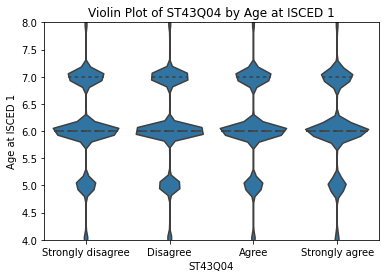

In [46]:
# Control vs Age at ISCED 1 (pt2)
sb.violinplot(data = df_pisa, x = 'ST43Q04', y = 'ST06Q01', color = sb.color_palette()[0], inner = 'quartile')
plt.ylabel('Age at ISCED 1')
plt.title('Violin Plot of ST43Q04 by Age at ISCED 1')
plt.ylim(4, 8);

> 'ST43Q04' = If I had different teachers, I would try harder in mathematics.

> 'ST06Q01' = How old were you when you started ISCED 1?

Once gain the peaks seem higher when the perception of control is higher (when student's disagree on this question), although differences seem less visible here. It's easier to note on the cases where student's highly agree that teachers are to blame for their efforts, it seems those students are more likely to have started ISCED 1 later than the others. Still, very few differences.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We didn't find a relationship between perception of control and truancy in students, through visualizations. Most of the relationships we found between perception of control and math work ethics were as expected and mentioned earlier, so, in general:
* Students that mention they are the reason for their math outcomes (reportedly) study more for math quizzes and to understand the subject

BUT we did find 2 interesting ones:
* Students who (reportedly) study less for math quizzes put less blame on the teacher for their effort than the average student;
* Students who strongly blame their teachers for not working harder also (reportedly) spend a high effort in studying math until they understand it

I wasn't expecting it since it's not the usual "higher control = higher effort", it's the opposite, but these two seem to be somewhat connected.

When it comes to age, it seems that:
* Students that started ISCED 1 at a more common age (5,6 or 7) are more likely to perceive they have control for their outcomes in mathematics than the ones that started at a later age.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It's interesting, although somewhat expected, that students with higher truancy study less for math quizzes. The same thing happens of their effort to study to understand materials, but not as strongly as for math quizzes.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [100]:
var = df_pisa.groupby(['ST115Q01', 'ST46Q04','ST43Q02']).size()
var = var.reset_index(name='count')
var = var.pivot(index = 'ST115Q01', columns = ['ST43Q02','ST46Q04'] , values = 'count')
var

ST43Q02,Strongly disagree,Disagree,Agree,Strongly agree,Strongly disagree,Disagree,Agree,Strongly agree,Strongly disagree,Disagree,Agree,Strongly agree,Strongly disagree,Disagree,Agree,Strongly agree
ST46Q04,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Disagree,Agree,Agree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
ST115Q01,,,,,,,,,,,,,,,,
1,1021,1860,4746,5975,1049,10081,37568,25354,1395,11482,43470,36150,1096,4176,10162,22919
2,338,603,1450,1671,323,2665,9495,6021,287,2320,8490,6608,223,814,1800,3643
3,87,151,341,362,59,438,1411,924,34,285,1006,820,36,88,234,464
4,131,105,267,296,34,236,694,527,37,151,504,380,20,57,119,286


In [101]:
var = df_pisa.groupby(['ST115Q01', 'ST46Q04','ST43Q02']).size()
var = var.reset_index(name='count')
var = var.pivot(index = 'ST115Q01', columns = ['ST43Q02','ST46Q04'] , values = 'count')

g = sb.FacetGrid(data = var, col = 'ST115Q01', col_wrap = 4, margin_titles = True)
g.map(plt.hist2d, 'ST43Q02', 'ST46Q04', color = 'veridis_r');

KeyError: 'ST115Q01'

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

